<a href="https://colab.research.google.com/github/Mahmoud9356/DEPI-Project/blob/main/HR_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. Importing Libraries

In [2]:
#import numpy, pandas, matplotlib, selected imports from sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import classification_report

## 1. Overview



###Goal:

  Create a classification model that is based on a Human Resources Dataset of a certain company to predict and forecast employee attrition

###Methodology:

1. Pre-process data to be in the appropriate form for the model
2. Split the data to two sets: training set, testing set
3. Train two models: Logistic Regression model, Random Forest model
4. Evaluate and compare the two models and select the more fitting
5. Deploy the model

##2. Data Pre-processing

###2.1 Data Overview

<center>\begin{array}{c|c|c|c}
\text{Coloumn Header}&\text{Description}&\text{Relevancy}&\text{Type}\\
\hline
\text{EmployeeID}&\text{Holds ID of the employee}&\text{Irrelevant}&\text{ - }\\
\hline
\text{FirstName}&\text{Holds first name of the employee}&\text{Irrelevant}&\text{ - }\\
\hline
\text{LastName}&\text{Holds last name of the employee}&\text{Irrelevant}&\text{ - }\\
\hline
\text{Gender}&\text{Represents the employee's gender}&\text{Relevant}&\text{Categorical}\\
\hline
\text{Age}&\text{Represents the employee's age}&\text{Relevant}&\text{Categorical}\\
\hline
\text{BusinessTravel}&\text{Represents the employee's frequency of work travel}&\text{Relevant}&\text{Categorical}\\
\hline
\text{Department}&\text{Holds the assigned department of the employee}&\text{Relevant}&\text{Categorical}\\
\hline
\text{DistanceFromHome (KM)}&\text{Distance from work office to employee's home}&\text{Relevant}&\text{Numerical}\\
\hline
\text{State}&\text{State the employee resides in}&\text{Relevant}&\text{Categorical}\\
\hline
\text{Ethnicity}&\text{Ethnic group of the employee}&\text{Relevant}&\text{Categorical}\\
\hline
\text{Education}&\text{Education level of the employee}&\text{Relevant}&\text{Categorical}\\
\hline
\text{EducationField}&\text{Field of education of the employee}&\text{Relevant}&\text{Categorical}\\
\hline
\text{JobRole}&\text{Current job role of the employee}&\text{Relevant}&\text{Categorical}\\
\hline
\text{MaritalStatus}&\text{Current marital status of the employee}&\text{Relevant}&\text{Categorical}\\
\hline
\text{Salary}&\text{Current monthly salary of the employee}&\text{Relevant}&\text{Numerical}\\
\hline
\text{StockOptionLevel}&\text{Stock option level of the employee}&\text{Relevant}&\text{Categorical}\\
\hline
\text{OverTime}&\text{Whether or not the employee works overtime}&\text{Relevant}&\text{Categorical}\\
\hline
\text{HireDate}&\text{Date the employee was hired on}&\text{Irrelevant}&\text{ - }\\
\hline
\text{Attrition}&\text{Whether or not the employee left the company}&\text{Relevant}&\text{Categorical}\\
\hline
\text{YearsAtCompany}&\text{Amount of years the employee spent in the company}&\text{Relevant}&\text{Numerical}\\
\hline
\text{YearsInMostRecentRole}&\text{Amount of years the employee spent in their most recent role}&\text{Relevant}&\text{Numerical}\\
\hline
\text{YearsSinceLastPromotion}&\text{Amount of years the employee spent without a promotion}&\text{Relevant}&\text{Numerical}\\
\hline
\text{YearsWithCurrManager}&\text{Amount of years the employee spent with his current manager}&\text{Relevant}&\text{Numerical}\\
\hline
\text{AvgEnvironmentSatisfaction}&\text{Average environment satisfaction level of the employee}&\text{Relevant}&\text{Numerical}\\
\hline
\text{AvgJobSatisfaction}&\text{Average job satisfaction level of the employee}&\text{Relevant}&\text{Numerical}\\
\hline
\text{AvgRelationshipSatisfaction}&\text{Average relationship satisfaction level of the employee}&\text{Relevant}&\text{Numerical}\\
\hline
\text{AvgTrainingOpportunitiesWithinYear}&\text{Average training opprtunites  availabe for the employee}&\text{Relevant}&\text{Numerical}\\
\hline
\text{AvgTrainingOpportunitiesTaken}&\text{Average training opportunities taken by the employee}&\text{Relevant}&\text{Numerical}\\
\hline
\text{AvgWorkLifeBalance}&\text{Average work life balance satisfaction level of the employee}&\text{Relevant}&\text{Numerical}\\
\hline
\text{AvgSelfRating}&\text{Average performance self rating of the employee}&\text{Relevant}&\text{Numerical}\\
\hline
\text{AvgManagerRating}&\text{Average perfomance manager rating of the employee}&\text{Relevant}&\text{Numerical}\\
\end{array}</center>

In [22]:
#print the full data
np.set_printoptions(legacy='1.13')
pd.options.display.max_columns = 500
emp_df = pd.read_csv("/content/drive/MyDrive/Depi/Employee&Performance_Cleaned_NAR.csv")
emp_df

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgEnvironmentSatisfaction,AvgJobSatisfaction,AvgRelationshipSatisfaction,AvgTrainingOpportunitiesWithinYear,AvgTrainingOpportunitiesTaken,AvgWorkLifeBalance,AvgSelfRating,AvgManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,3/1/2012,No,10,4,9,7,3.5556,3.6667,3.3333,2.0000,0.3333,3.3333,4.1111,3.5556
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,4/1/2012,No,10,6,10,0,3.8889,3.3333,3.7778,2.4444,0.7778,3.0000,4.2222,3.8889
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,4/1/2012,No,10,6,10,8,3.8889,3.5556,2.8889,2.1111,0.6667,3.7778,3.5556,3.0000
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,5/1/2012,No,10,10,10,0,3.2222,4.0000,3.3333,2.0000,1.3333,2.7778,3.8889,3.5556
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,5/1/2012,Yes,6,1,1,6,4.0000,3.4444,3.7778,1.7778,1.3333,4.3333,3.7778,3.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,2,Computer Science,Software Engineer,Single,38508,0,No,26/12/2022,No,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,3,Business Studies,Senior Software Engineer,Single,92995,3,No,30/12/2022,No,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,4,Marketing,Sales Executive,Single,63375,0,No,30/12/2022,No,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,3,Information Systems,Data Scientist,Married,46521,0,No,30/12/2022,No,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


###2.2 Data transformation

####2.2.1 Proposed Tranformations:

<center>\begin{array}{c|c}
\text{Coloumn Header}&\text{Transformation}\\
\hline
\text{EmployeeID}&\text{Drop}\\
\hline
\text{FirstName}&\text{Drop}\\
\hline
\text{LastName}&\text{Drop}\\
\hline
\text{Gender}&\text{Binary Encode}\\
\hline
\text{Age}&\text{Scale/Leave}\\
\hline
\text{BusinessTravel}&\text{One-Hot Encode}\\
\hline
\text{Department}&\text{One-Hot Encode}\\
\hline
\text{DistanceFromHome (KM)}&\text{Scale/Leave}\\
\hline
\text{State}&\text{One-Hot Encode}\\
\hline
\text{Ethnicity}&\text{One-Hot Encode}\\
\hline
\text{Education}&\text{One-Hot Encode}\\
\hline
\text{EducationField}&\text{One-Hot Encode}\\
\hline
\text{JobRole}&\text{One-Hot Encode}\\
\hline
\text{MaritalStatus}&\text{One-Hot Encode}\\
\hline
\text{Salary}&\text{Scale/Leave}\\
\hline
\text{StockOptionLevel}&\text{One-Hot Encode}\\
\hline
\text{OverTime}&\text{Binary Encode}\\
\hline
\text{HireDate}&\text{Drop}\\
\hline
\text{Attrition}&\text{Binary Encode}\\
\hline
\text{YearsAtCompany}&\text{Scale/Leave}\\
\hline
\text{YearsInMostRecentRole}&\text{Scale/Leave}\\
\hline
\text{YearsSinceLastPromotion}&\text{Scale/Leave}\\
\hline
\text{YearsWithCurrManager}&\text{Scale/Leave}\\
\hline
\text{AvgEnvironmentSatisfaction}&\text{Scale/Leave}\\
\hline
\text{AvgJobSatisfaction}&\text{Scale/Leave}\\
\hline
\text{AvgRelationshipSatisfaction}&\text{Scale/Leave}\\
\hline
\text{AvgTrainingOpportunitiesWithinYear}&\text{Scale/Leave}\\
\hline
\text{AvgTrainingOpportunitiesTaken}&\text{Scale/Leave}\\
\hline
\text{AvgWorkLifeBalance}&\text{Scale/Leave}\\
\hline
\text{AvgSelfRating}&\text{Scale/Leave}\\
\hline
\text{AvgManagerRating}&\text{Scale/Leave}\\
\end{array}</center>

####2.2.2 Binary Encoding

Values to be transformed: [Gender, Overtime, Attrition] <br>
Check values are binary:

In [23]:
print(emp_df.Gender.value_counts(), emp_df.OverTime.value_counts(), emp_df.Attrition.value_counts())

Gender
Female               675
Male                 651
Non-Binary           124
Prefer Not To Say     20
Name: count, dtype: int64 OverTime
No     1054
Yes     416
Name: count, dtype: int64 Attrition
No     1233
Yes     237
Name: count, dtype: int64


Gender has more than two values; it'll be One-Hot encoded instead. <br>
Overtime and Attrition fit the requirments and will proceed with the transformation.

In [24]:
emp_df['Attrition'] = emp_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
emp_df['OverTime'] = emp_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

####2.2.3 One-Hot Encoding

Values to be transformed: [Gender, Business Travel, Department, Ethnicity, Education, Education Field, Job Role, State, Marital Status, Stock Option]

In [25]:
emp_df = emp_df.join(pd.get_dummies(emp_df['Gender'],prefix='Gender')).drop('Gender', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['BusinessTravel'], prefix = 'Travel')).drop('BusinessTravel', axis=1)
emp_df = emp_df.join(pd.get_dummies(emp_df['Department'], prefix = 'Department')).drop('Department', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['Ethnicity'], prefix = 'Ethnicity')).drop('Ethnicity', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['Education'], prefix = 'Education Level:')).drop('Education', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['EducationField'], prefix = 'Field')).drop('EducationField', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['JobRole'],prefix = 'Role')).drop('JobRole', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['State'], prefix = 'State')).drop('State', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['MaritalStatus'], prefix='Status')).drop('MaritalStatus', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['StockOptionLevel'], prefix='StockOptionLevel')).drop('StockOptionLevel', axis = 1)
emp_df

,EmployeeID,FirstName,LastName,Age,DistanceFromHome (KM),Salary,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgEnvironmentSatisfaction,AvgJobSatisfaction,AvgRelationshipSatisfaction,AvgTrainingOpportunitiesWithinYear,AvgTrainingOpportunitiesTaken,AvgWorkLifeBalance,AvgSelfRating,AvgManagerRating,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Prefer Not To Say,Travel_Frequent Traveller,Travel_No Travel,Travel_Some Travel,Department_Human Resources,Department_Sales,Department_Technology,Ethnicity_American Indian or Alaska Native,Ethnicity_Asian or Asian American,Ethnicity_Black or African American,Ethnicity_Mixed or multiple ethnic groups,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White,Education Level:_1,Education Level:_2,Education Level:_3,Education Level:_4,Education Level:_5,Field_Business Studies,Field_Computer Science,Field_Economics,Field_Human Resources,Field_Information Systems,Field_Marketing,Field_Other,Field_Technical Degree,Role_Analytics Manager,Role_Data Scientist,Role_Engineering Manager,Role_HR Business Partner,Role_HR Executive,Role_HR Manager,Role_Machine Learning Engineer,Role_Manager,Role_Recruiter,Role_Sales Executive,Role_Sales Representative,Role_Senior Software Engineer,Role_Software Engineer,State_CA,State_IL,State_NY,Status_Divorced,Status_Married,Status_Single,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,3012-1A41,Leonelle,Simco,30,27,102059,0,3/1/2012,0,10,4,9,7,3.5556,3.6667,3.3333,2.0000,0.3333,3.3333,4.1111,3.5556,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False
1,CBCB-9C9D,Leonerd,Aland,38,23,157718,1,4/1/2012,0,10,6,10,0,3.8889,3.3333,3.7778,2.4444,0.7778,3.0000,4.2222,3.8889,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False
2,95D7-1CE9,Ahmed,Sykes,43,29,309964,0,4/1/2012,0,10,6,10,8,3.8889,3.5556,2.8889,2.1111,0.6667,3.7778,3.5556,3.0000,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False
3,47A0-559B,Ermentrude,Berrie,39,12,293132,0,5/1/2012,0,10,10,10,0,3.2222,4.0000,3.3333,2.0000,1.3333,2.7778,3.8889,3.5556,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False
4,42CC-040A,Stace,Savege,29,29,49606,0,5/1/2012,1,6,1,1,6,4.0000,3.4444,3.7778,1.7778,1.3333,4.3333,3.7778,3.0000,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,20,28,38508,0,26/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.

In [26]:
emp_df = emp_df.map(lambda x: 1 if x == True else 0 if x == False else x)
emp_df

,EmployeeID,FirstName,LastName,Age,DistanceFromHome (KM),Salary,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgEnvironmentSatisfaction,AvgJobSatisfaction,AvgRelationshipSatisfaction,AvgTrainingOpportunitiesWithinYear,AvgTrainingOpportunitiesTaken,AvgWorkLifeBalance,AvgSelfRating,AvgManagerRating,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Prefer Not To Say,Travel_Frequent Traveller,Travel_No Travel,Travel_Some Travel,Department_Human Resources,Department_Sales,Department_Technology,Ethnicity_American Indian or Alaska Native,Ethnicity_Asian or Asian American,Ethnicity_Black or African American,Ethnicity_Mixed or multiple ethnic groups,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White,Education Level:_1,Education Level:_2,Education Level:_3,Education Level:_4,Education Level:_5,Field_Business Studies,Field_Computer Science,Field_Economics,Field_Human Resources,Field_Information Systems,Field_Marketing,Field_Other,Field_Technical Degree,Role_Analytics Manager,Role_Data Scientist,Role_Engineering Manager,Role_HR Business Partner,Role_HR Executive,Role_HR Manager,Role_Machine Learning Engineer,Role_Manager,Role_Recruiter,Role_Sales Executive,Role_Sales Representative,Role_Senior Software Engineer,Role_Software Engineer,State_CA,State_IL,State_NY,Status_Divorced,Status_Married,Status_Single,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,3012-1A41,Leonelle,Simco,30,27,102059,0,3/1/2012,0,10,4,9,7,3.5556,3.6667,3.3333,2.0000,0.3333,3.3333,4.1111,3.5556,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,CBCB-9C9D,Leonerd,Aland,38,23,157718,1,4/1/2012,0,10,6,10,0,3.8889,3.3333,3.7778,2.4444,0.7778,3.0000,4.2222,3.8889,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,95D7-1CE9,Ahmed,Sykes,43,29,309964,0,4/1/2012,0,10,6,10,8,3.8889,3.5556,2.8889,2.1111,0.6667,3.7778,3.5556,3.0000,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,47A0-559B,Ermentrude,Berrie,39,12,293132,0,5/1/2012,0,10,10,10,0,3.2222,4.0000,3.3333,2.0000,1.3333,2.7778,3.8889,3.5556,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,42CC-040A,Stace,Savege,29,29,49606,0,5/1/2012,1,6,1,1,6,4.0000,3.4444,3.7778,1.7778,1.3333,4.3333,3.7778,3.0000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,20,28,38508,0,26/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0
1466,6FB9-A624,Marc,Calver,27,8,92995,0,30/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1467,EBF4-5928,Rudolph,MacDearmont,21,4,63375,0,30/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
1468,60E6-B1D9,Merill,Agg,21,7,46521,0,30/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


####2.2.4 Drop Columns

Values to be transformed: [Employee ID, First Name, Last Name, Hire date]

In [27]:
emp_df = emp_df.drop(['EmployeeID', 'FirstName', 'LastName', 'HireDate'], axis = 1)
emp_df

,Age,DistanceFromHome (KM),Salary,OverTime,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgEnvironmentSatisfaction,AvgJobSatisfaction,AvgRelationshipSatisfaction,AvgTrainingOpportunitiesWithinYear,AvgTrainingOpportunitiesTaken,AvgWorkLifeBalance,AvgSelfRating,AvgManagerRating,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Prefer Not To Say,Travel_Frequent Traveller,Travel_No Travel,Travel_Some Travel,Department_Human Resources,Department_Sales,Department_Technology,Ethnicity_American Indian or Alaska Native,Ethnicity_Asian or Asian American,Ethnicity_Black or African American,Ethnicity_Mixed or multiple ethnic groups,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White,Education Level:_1,Education Level:_2,Education Level:_3,Education Level:_4,Education Level:_5,Field_Business Studies,Field_Computer Science,Field_Economics,Field_Human Resources,Field_Information Systems,Field_Marketing,Field_Other,Field_Technical Degree,Role_Analytics Manager,Role_Data Scientist,Role_Engineering Manager,Role_HR Business Partner,Role_HR Executive,Role_HR Manager,Role_Machine Learning Engineer,Role_Manager,Role_Recruiter,Role_Sales Executive,Role_Sales Representative,Role_Senior Software Engineer,Role_Software Engineer,State_CA,State_IL,State_NY,Status_Divorced,Status_Married,Status_Single,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,30,27,102059,0,0,10,4,9,7,3.5556,3.6667,3.3333,2.0000,0.3333,3.3333,4.1111,3.5556,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,38,23,157718,1,0,10,6,10,0,3.8889,3.3333,3.7778,2.4444,0.7778,3.0000,4.2222,3.8889,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,43,29,309964,0,0,10,6,10,8,3.8889,3.5556,2.8889,2.1111,0.6667,3.7778,3.5556,3.0000,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,39,12,293132,0,0,10,10,10,0,3.2222,4.0000,3.3333,2.0000,1.3333,2.7778,3.8889,3.5556,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,29,29,49606,0,1,6,1,1,6,4.0000,3.4444,3.7778,1.7778,1.3333,4.3333,3.7778,3.0000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,20,28,38508,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0
1466,27,8,92995,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1467,21,4,63375,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
1468,21,7,46521,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


####2.2.5 Scaling Columns

Values to be transformed: [Age, DistanceFromHome (KM), Salary, YearsAtCompany, YearsInMostRecentRole, YearsSinceLastPromotion, YearsWithCurrManager, AvgEnvironmentSatisfaction, AvgJobSatisfaction, AvgRelationshipSatisfaction, AvgTrainingOpportunitiesWithinYear, AvgTrainingOpportunitiesTaken, AvgWorkLifeBalance, AvgSelfRating, AvgManagerRating]

Scaling will be done by flagging non-scaling columns with the DataType Category

In [29]:
variables_to_scale = ['Age', 'DistanceFromHome (KM)', 'Salary', 'YearsAtCompany', 'YearsInMostRecentRole',
                      'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AvgEnvironmentSatisfaction', 'AvgJobSatisfaction',
                      'AvgRelationshipSatisfaction', 'AvgTrainingOpportunitiesWithinYear', 'AvgTrainingOpportunitiesTaken',
                      'AvgWorkLifeBalance', 'AvgSelfRating', 'AvgManagerRating']
for col in emp_df:
  if col not in variables_to_scale:
    emp_df[col] = emp_df[col].astype('category')

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, selector(dtype_exclude="category")),
                  ("cat", "passthrough", selector(dtype_include="category"))])

RFCModel = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])
LogRegModel = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())])

####2.2.6 Final Tranformations & visualization:

<center>\begin{array}{c|c}
\text{Coloumn Header}&\text{Transformation}\\
\hline
\text{EmployeeID}&\text{Drop}\\
\hline
\text{FirstName}&\text{Drop}\\
\hline
\text{LastName}&\text{Drop}\\
\hline
\text{Gender}&\text{One-Hot Encode}\\
\hline
\text{Age}&\text{Scale/Leave}\\
\hline
\text{BusinessTravel}&\text{One-Hot Encode}\\
\hline
\text{Department}&\text{One-Hot Encode}\\
\hline
\text{DistanceFromHome (KM)}&\text{Scale/Leave}\\
\hline
\text{State}&\text{One-Hot Encode}\\
\hline
\text{Ethnicity}&\text{One-Hot Encode}\\
\hline
\text{Education}&\text{One-Hot Encode}\\
\hline
\text{EducationField}&\text{One-Hot Encode}\\
\hline
\text{JobRole}&\text{One-Hot Encode}\\
\hline
\text{MaritalStatus}&\text{One-Hot Encode}\\
\hline
\text{Salary}&\text{Scale/Leave}\\
\hline
\text{StockOptionLevel}&\text{One-Hot Encode}\\
\hline
\text{OverTime}&\text{Binary Encode}\\
\hline
\text{HireDate}&\text{Drop}\\
\hline
\text{Attrition}&\text{Binary Encode}\\
\hline
\text{YearsAtCompany}&\text{Scale/Leave}\\
\hline
\text{YearsInMostRecentRole}&\text{Scale/Leave}\\
\hline
\text{YearsSinceLastPromotion}&\text{Scale/Leave}\\
\hline
\text{YearsWithCurrManager}&\text{Scale/Leave}\\
\hline
\text{AvgEnvironmentSatisfaction}&\text{Scale/Leave}\\
\hline
\text{AvgJobSatisfaction}&\text{Scale/Leave}\\
\hline
\text{AvgRelationshipSatisfaction}&\text{Scale/Leave}\\
\hline
\text{AvgTrainingOpportunitiesWithinYear}&\text{Scale/Leave}\\
\hline
\text{AvgTrainingOpportunitiesTaken}&\text{Scale/Leave}\\
\hline
\text{AvgWorkLifeBalance}&\text{Scale/Leave}\\
\hline
\text{AvgSelfRating}&\text{Scale/Leave}\\
\hline
\text{AvgManagerRating}&\text{Scale/Leave}\\
\end{array}</center>

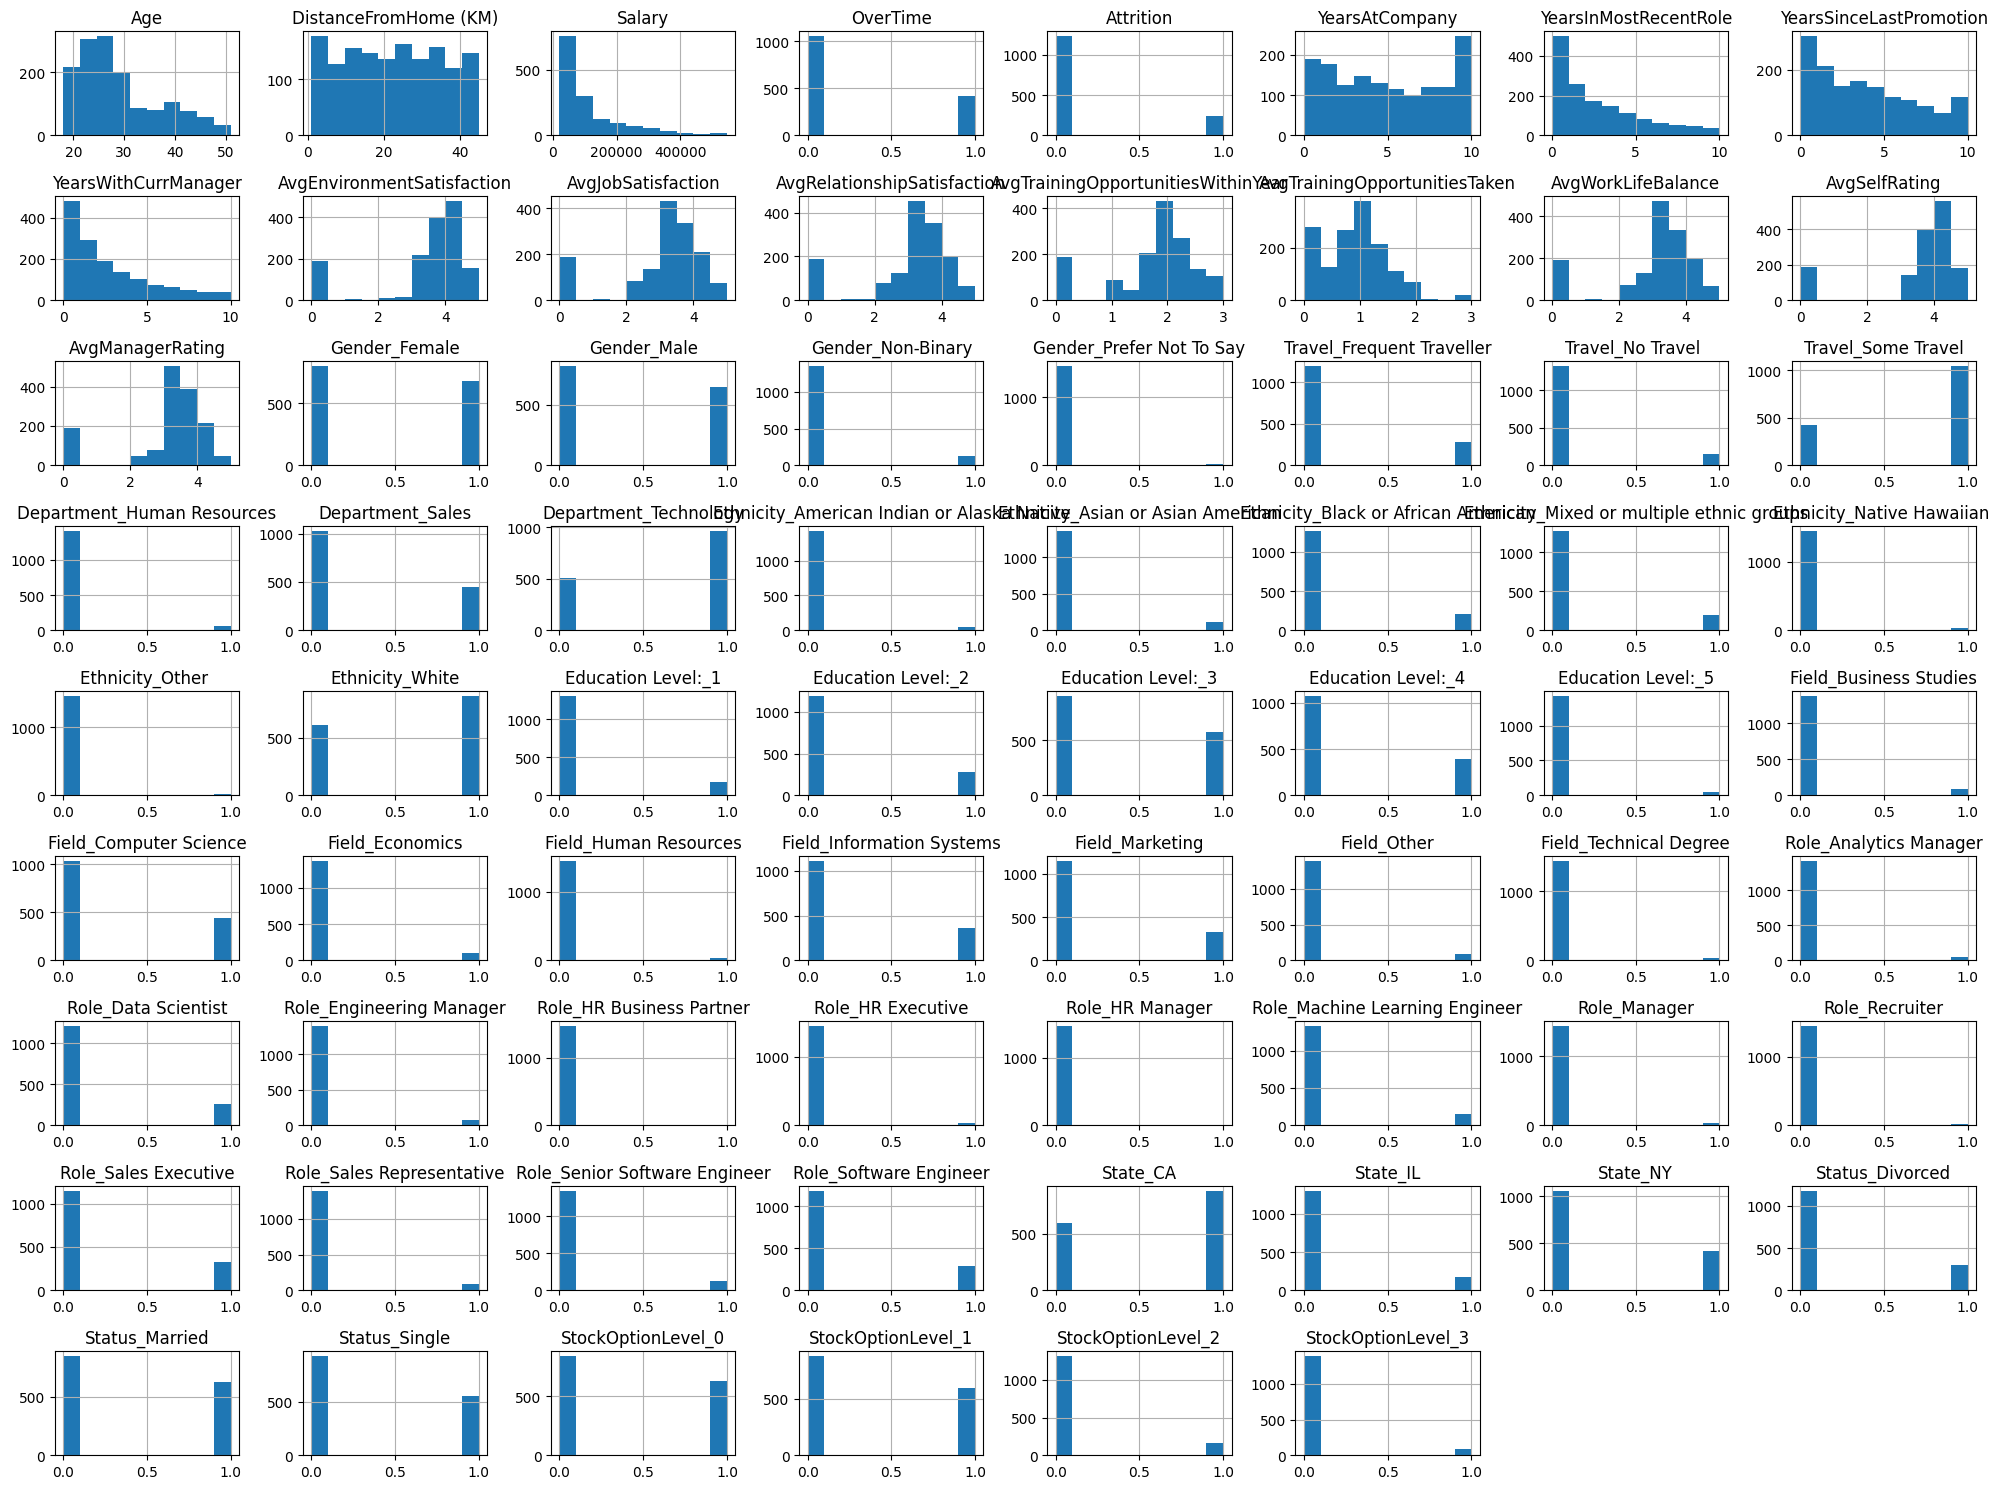

In [28]:
emp_df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

##3. Data Splitting & Models Training

Data is splitted to 80/20

In [ ]:
X, y = emp_df.drop('Attrition', axis=1), emp_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Training Random Forest Classifier

In [ ]:
RFCModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a61e4e23ad0>),
                                                 ('cat', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a61e4e22f00>)])),
                ('classifier', RandomForestClassifier())])

Training Logistic Regression

In [ ]:
LogRegModel.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a61e4e23ad0>),
                                                 ('cat', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a61e4e22f00>)])),
                ('classifier', LogisticRegression())])

##4. Models Evaluation & Selection

In [ ]:
RFCModel2 = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])
RFCModel2.fit(X_train, y_train)
RFCModel2.score(X_test, y_test)

0.9625850340136054

In [ ]:
sorted_importances = dict(sorted(zip(RFCModel2.steps[0][1].feature_names_in_, RFCModel2.steps[1][1].feature_importances_), key = lambda x: x[1], reverse = True))
dict(list(sorted_importances.items())[:10])

{'OverTime': 0.10060701647866568,
 'YearsInMostRecentRole': 0.091266441420009822,
 'AvgWorkLifeBalance': 0.059119278574566343,
 'AvgEnvironmentSatisfaction': 0.056231724017687258,
 'AvgJobSatisfaction': 0.055802587283587786,
 'YearsWithCurrManager': 0.054526488562624903,
 'AvgSelfRating': 0.049312430915956544,
 'AvgTrainingOpportunitiesWithinYear': 0.047496367701874861,
 'Salary': 0.04500400927870777,
 'AvgTrainingOpportunitiesTaken': 0.044072227329197043}

In [ ]:
RFCModel = RFCModel2

In [ ]:
RFCModel.score(X_test, y_test)

0.9625850340136054

In [ ]:
LogRegModel.score(X_test, y_test)

0.9183673469387755

Score of RandamForestClassifier is more than Logistic Regression. </br>
As such, we will proceed with the Random Forest Classifier.

In [ ]:
y_pred = RFCModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       247
           1       1.00      0.79      0.88        47

    accuracy                           0.97       294
   macro avg       0.98      0.89      0.93       294
weighted avg       0.97      0.97      0.96       294



##5. Feature Importances & Forecasting

Top 10 Features are:
1. OverTime
2. YearsInMostRecentRole
3. AvgWorkLifeBalance
4. AvgEnvironmentSatisfaction
5. AvgJobSatisfaction
6. YearsWithCurrManager
7. AvgSelfRating
8. AvgTrainingOpportunitiesWithinYear
9. Salary
10. AvgTrainingOpportunitiesTaken

(this list is susceptible to change between different runs as a result of the algorithim's nature)

In [ ]:
sorted_importances = dict(sorted(zip(RFCModel.steps[0][1].feature_names_in_, RFCModel.steps[1][1].feature_importances_), key = lambda x: x[1], reverse = True))
dict(list(sorted_importances.items())[:10])

{'OverTime': 0.10060701647866568,
 'YearsInMostRecentRole': 0.091266441420009822,
 'AvgWorkLifeBalance': 0.059119278574566343,
 'AvgEnvironmentSatisfaction': 0.056231724017687258,
 'AvgJobSatisfaction': 0.055802587283587786,
 'YearsWithCurrManager': 0.054526488562624903,
 'AvgSelfRating': 0.049312430915956544,
 'AvgTrainingOpportunitiesWithinYear': 0.047496367701874861,
 'Salary': 0.04500400927870777,
 'AvgTrainingOpportunitiesTaken': 0.044072227329197043}

Visualization of with all the features:

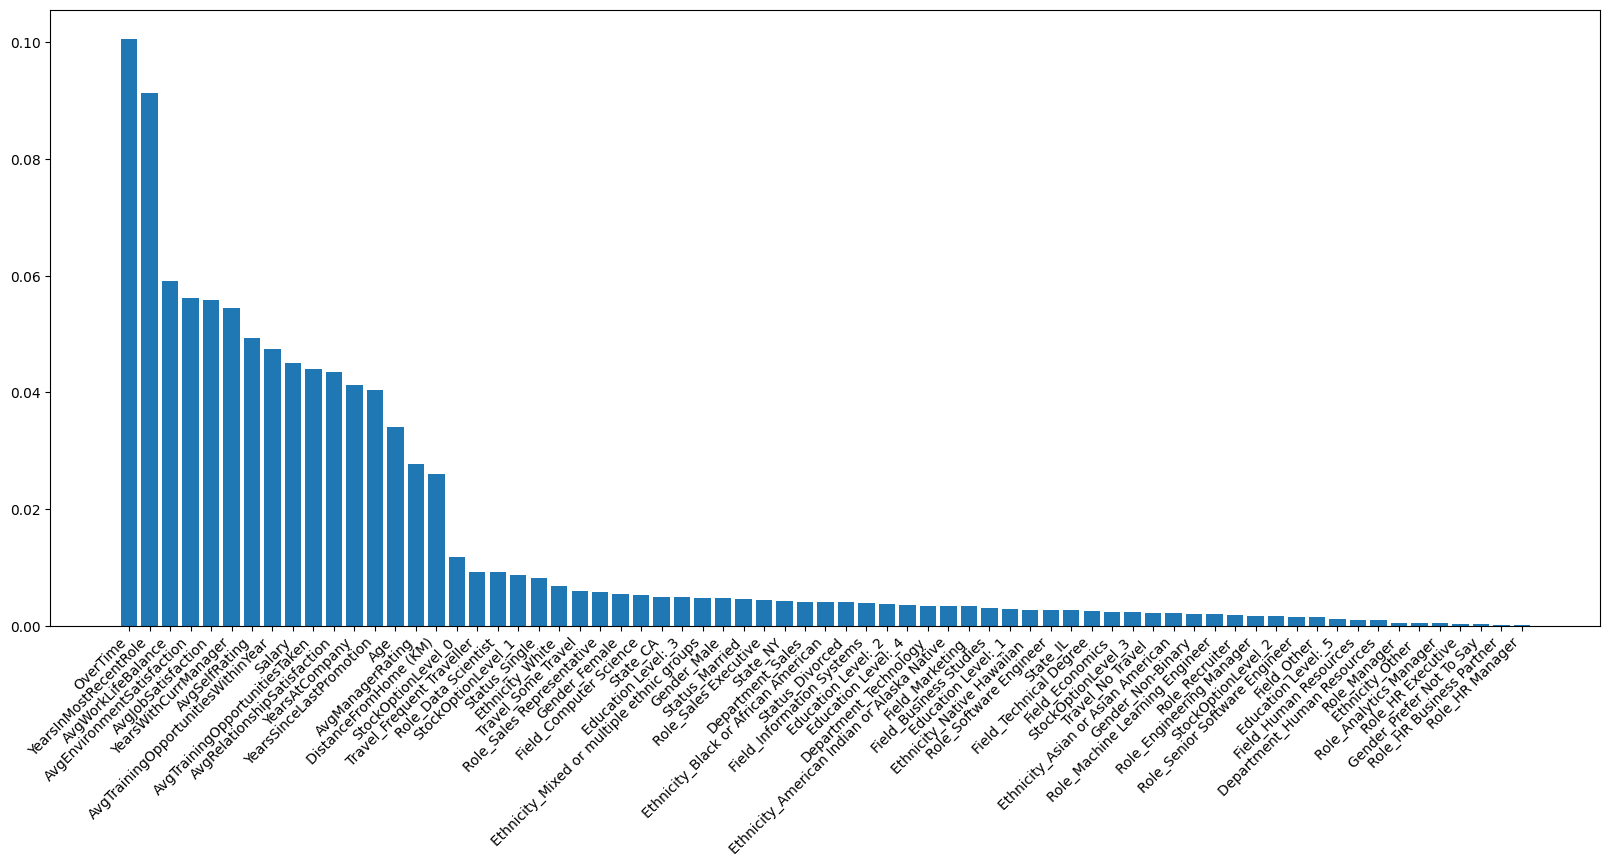

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Forecasting attrition rate with changes to the top 3 features:



1. What would happen if working overtime was eliminated from the company?

In [ ]:
emp_count = 1470
cur_rate = emp_df['Attrition'].value_counts(normalize=True)
emp_df_time = emp_df.drop('Attrition', axis=1)
emp_df_time['OverTime'] = 0
prediction_data = emp_df_time
prediction_time = RFCModel.predict(prediction_data)
unique, counts = np.unique(prediction_time, return_counts=True)
prediction = dict(zip(unique, counts))
new_rate = prediction[1]/emp_count * 100
print(f"Current Attrition Rate: {cur_rate[1]*100:.2f}%")
print(f"New Attrition Rate: {new_rate:.2f}%")
print(f"Change in Attrition: {cur_rate[1]*100 - new_rate:.2f}%")

Current Attrition Rate: 16.12%
New Attrition Rate: 13.61%
Change in Attrition: 2.52%


2. What would happen if employees remained in their role for 2 extra years?

In [ ]:
emp_df_year = emp_df.drop('Attrition', axis=1)
emp_df_year['YearsInMostRecentRole'] = emp_df['YearsInMostRecentRole'] + 2
prediction_data = emp_df_year
prediction = RFCModel.predict(prediction_data)
unique, counts = np.unique(prediction, return_counts=True)
prediction = dict(zip(unique, counts))
new_rate = prediction[1]/emp_count * 100
print(f"Current Attrition Rate: {cur_rate[1]*100:.2f}%")
print(f"New Attrition Rate: {new_rate:.2f}%")
print(f"Change in Attrition: {cur_rate[1]*100 - new_rate:.2f}%")

Current Attrition Rate: 16.12%
New Attrition Rate: 15.10%
Change in Attrition: 1.02%


3. What would happen if Work Life balance increased by 50% for all employees?

In [ ]:
emp_df_balance = emp_df.drop('Attrition', axis=1)
emp_df_balance['AvgWorkLifeBalance'] = emp_df['AvgWorkLifeBalance'] * 1.5
emp_df_balance.loc[emp_df_balance['AvgWorkLifeBalance'] > 5, 'AvgWorkLifeBalance'] = 5
prediction_data = emp_df_balance
prediction = RFCModel.predict(prediction_data)
unique, counts = np.unique(prediction, return_counts=True)
prediction = dict(zip(unique, counts))
new_rate = prediction[1]/emp_count * 100
print(f"Current Attrition Rate: {cur_rate[1]*100:.2f}%")
print(f"New Attrition Rate: {new_rate:.2f}%")
print(f"Change in Attrition: {cur_rate[1]*100 - new_rate:.2f}%")

Current Attrition Rate: 16.12%
New Attrition Rate: 15.03%
Change in Attrition: 1.09%


In [ ]:
emp_df_combination = emp_df.drop('Attrition', axis=1)
emp_df_combination['OverTime'] = 0
emp_df_combination['YearsInMostRecentRole'] = emp_df['YearsInMostRecentRole'] + 2
emp_df_combination['AvgWorkLifeBalance'] = emp_df['AvgWorkLifeBalance'] * 1.5
emp_df_combination.loc[emp_df_balance['AvgWorkLifeBalance'] > 5, 'AvgWorkLifeBalance'] = 5
prediction_data = emp_df_combination
prediction = RFCModel.predict(prediction_data)
unique, counts = np.unique(prediction, return_counts=True)
prediction = dict(zip(unique, counts))
new_rate = prediction[1]/emp_count * 100
print(f"Current Attrition Rate: {cur_rate[1]*100:.2f}%")
print(f"New Attrition Rate: {new_rate:.2f}%")
print(f"Change in Attrition: {cur_rate[1]*100 - new_rate:.2f}%")

Current Attrition Rate: 16.12%
New Attrition Rate: 10.75%
Change in Attrition: 5.37%


<center>\begin{array}{c|c|c}
\text{Feature(s)}&\text{Change Implemented}&\text{Change in Attrition}\\
\hline
\text{OverTime}&\text{Elimination of Overtime work}&\text{Decrease by 2.5%}\\
\hline
\text{YearsInMostRecentRole}&\text{Increase by 2 years}&\text{Decrease by 1%}\\
\hline
\text{AvgWorkLifeBalance}&\text{Increase by 50%}&\text{Decrease by 1%}\\
\hline
\text{Top 3 combined}&\text{Same as previous}&\text{Decrease by 5%}\\
\end{array}</center>